In [78]:
import pandas as pd
from sklearn import metrics
import seaborn as sns

In [79]:
data = pd.read_csv('train.csv')

In [80]:
data.groupby('Gender').describe()

Age                                                     \
        count       mean        std  min   25%   50%   75%   max   
Gender                                                             
Female  105.0  44.457143  14.937709  8.0  34.0  45.0  54.0  85.0   
Male    361.0  45.573407  15.923454  4.0  33.0  46.0  60.0  78.0   

       Total_Bilirubin            ... Albumin_and_Globulin_Ratio      Dataset  \
                 count      mean  ...                        75%  max   count   
Gender                            ...                                           
Female           105.0  2.102857  ...                        1.1  1.8   105.0   
Male             361.0  3.785596  ...                        1.1  2.8   361.0   

                                                     
            mean       std  min  25%  50%  75%  max  
Gender                                               
Female  1.323810  0.470173  1.0  1.0  1.0  2.0  2.0  
Male    1.274238  0.446749  1.0  1.0  1.0  2.0  2.0  

[2 rows x 80 columns]

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
Age                           466 non-null int64
Gender                        466 non-null object
Total_Bilirubin               466 non-null float64
Direct_Bilirubin              466 non-null float64
Alkaline_Phosphotase          466 non-null int64
Alamine_Aminotransferase      466 non-null int64
Aspartate_Aminotransferase    466 non-null int64
Total_Protiens                466 non-null float64
Albumin                       466 non-null float64
Albumin_and_Globulin_Ratio    463 non-null float64
Dataset                       466 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 40.1+ KB


In [82]:
data = data.dropna(how='any', axis = 0)

# DATA VISUALIZATION

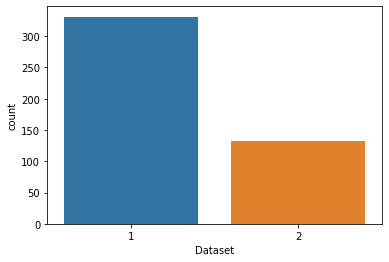

In [83]:
sns.countplot(data=data, x='Dataset')

In [84]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

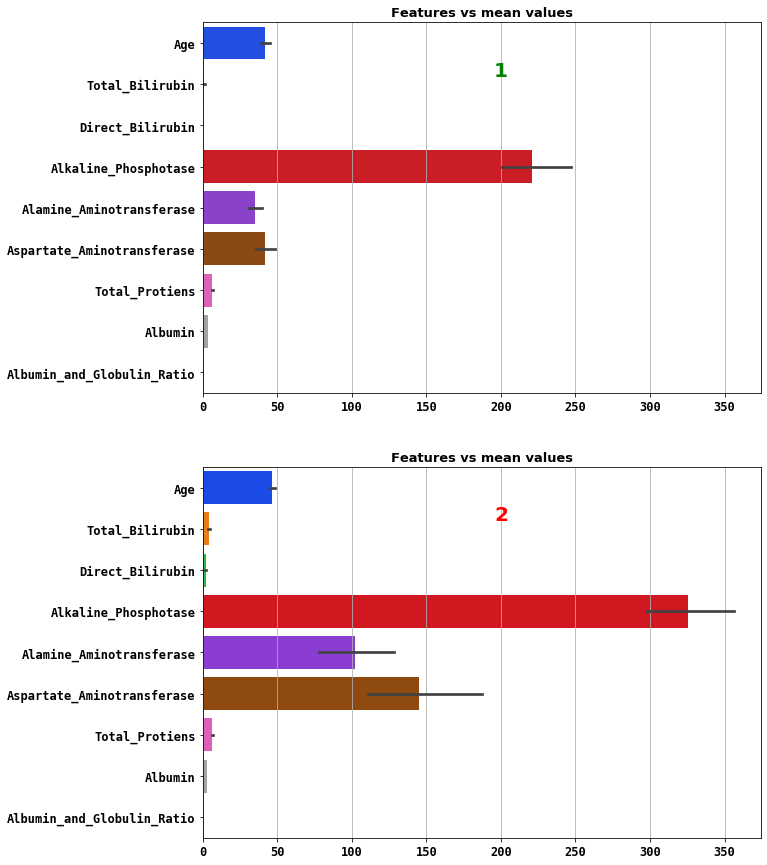

In [85]:
data1 = data[data['Dataset']==2] 
data1 = data1.iloc[:,:-1]

data2 = data[data['Dataset']==1] 
data2 = data2.iloc[:,:-1]

fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)

ax1.grid()
ax2.grid()

ax1.set_title('Features vs mean values',fontsize=13,weight='bold')
ax1.text(200,0.8,'1',fontsize=20,horizontalalignment='center',color='green',weight='bold')


ax2.set_title('Features vs mean values',fontsize=13,weight='bold')
ax2.text(200,0.8,'2',fontsize=20,horizontalalignment='center',color='red',weight='bold')

# for axis ax1
plt.sca(ax1)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')
# for axis ax2
plt.sca(ax2)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

sns.barplot(data=data1,ax=ax1,orient='horizontal', palette='bright') # no disease
sns.barplot(data=data2,ax=ax2,orient='horizontal',palette='bright',saturation=0.80)

In [86]:
#Since gender is categorical we need to convert it to numeric data.
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data['Dataset'] = data['Dataset'].map({2:0, 1:1})

In [87]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,0,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,1,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,0,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [65]:
from sklearn.model_selection import train_test_split

In [128]:
X = data[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase',
              'Aspartate_Aminotransferase','Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio' ]]
y = data['Dataset']


In [129]:
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=10,test_size=0.2)

# USING LOGISTIC REGRESSION

In [130]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

log_predicted = logreg.predict(X_test)

c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [131]:
print('Accuracy (Logistict Reg): \n', round(accuracy_score(y_test, log_predicted)*100,2), '%')

Accuracy (Logistict Reg): 
 78.49 %


# USING RANDOM FOREST

In [146]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)

rf_predicted = random_forest.predict(X_test)

In [147]:
print('Accuracy (Random Forest): \n', round(accuracy_score(y_test, rf_predicted)*100,2), '%')

Accuracy (Random Forest): 
 77.42 %


# saving to csv

In [160]:
test=pd.read_csv('test.csv')

In [161]:
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [162]:
len(test)

117

In [163]:
test['Gender']=test['Gender'].map({'Male':0,'Female':1})

In [164]:
test=test.fillna(test.mean())

In [165]:
X_train=data[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase',
              'Aspartate_Aminotransferase','Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio']]
y_train=data.Dataset

In [166]:
X_test=test[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase',
              'Aspartate_Aminotransferase','Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio']]

In [167]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [168]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [169]:
len(y_pred)

117

In [170]:
test['Dataset']=y_pred

In [171]:
test.to_csv('solution.csv')